In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [82]:
np.random.seed(42)

tree = np.random.rand(2000, 3) # 2000 rows, 3 columns for x, y and size

h = 13
maxsize = 8

tree[:, 0] = 10 * tree[:, 0]
tree[:, 1] = h * tree[:, 1]
tree[:, 2] = maxsize * tree[:, 2]

# select records so that remaining ones will look like a tree when plotted
tree = tree[(tree[:, 1] < h/5 * tree[:, 0]) & (tree[:, 1] < -h/5 * tree[:, 0] + 2 * h)]

In [83]:
data = pd.DataFrame({'x': tree[:, 0], 'y': tree[:, 1], 'size': tree[:, 2]})
data['color'] = 'green'

num_of_rows = data.shape[0]
data.loc[data.index > num_of_rows * 0.9, 'color'] = 'red'

In [84]:
star = pd.DataFrame({'x': [5], 'y': [h], 'size': [maxsize + 10], 'color': 'yellow'})

data = data.append(star)

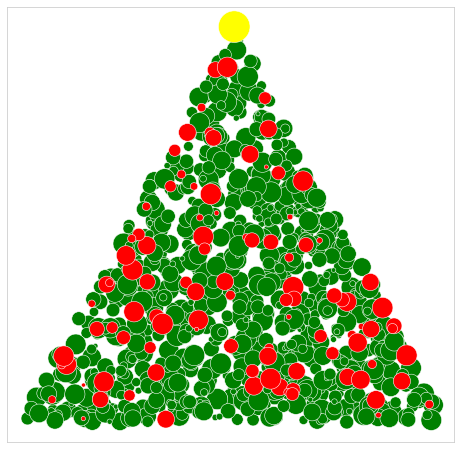

In [93]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.scatterplot(data=data,
                x='x',
                y='y',
                size='size',
                legend=False,
                sizes=(10, 1000),
                hue='color',
                palette=['green', 'red', 'yellow']
                )
ax.set(xlabel='', ylabel='', xticks=[], yticks=[])

plt.savefig('bubble_tree.png')
plt.show()